In [1]:
import pandas as pd
df = pd.read_csv('~/projects/dl_aitu/assg2/data/train/train_data.csv')

In [2]:
df.shape

(22848, 33)

In [3]:
import subprocess

def get_length(filename):
    result = subprocess.run(["ffprobe", "-v", "error", "-show_entries",
                             "format=duration", "-of",
                             "default=noprint_wrappers=1:nokey=1", filename],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT)
    return float(result.stdout)

In [4]:
frames = df.groupby('src_video').agg({'Nose_X':'count', 'action':'first'}).reset_index(drop=False)
frames.head()

,src_video,Nose_X,action
0,person01_boxing_d1_uncomp.avi,72,boxing
1,person01_boxing_d2_uncomp.avi,78,boxing
2,person01_boxing_d3_uncomp.avi,93,boxing
3,person01_boxing_d4_uncomp.avi,61,boxing
4,person01_handclapping_d1_uncomp.avi,76,handclapping


In [5]:
frames['dur'] = frames['src_video'].apply(lambda x: get_length('../data/train/' + x.split('_')[1] + '/' + x))
frames

,src_video,Nose_X,action,dur
0,person01_boxing_d1_uncomp.avi,72,boxing,14.40
1,person01_boxing_d2_uncomp.avi,78,boxing,15.60
2,person01_boxing_d3_uncomp.avi,93,boxing,18.60
3,person01_boxing_d4_uncomp.avi,61,boxing,12.12
4,person01_handclapping_d1_uncomp.avi,76,handclapping,15.12
...,...,...,...,...
352,person15_running_d4_uncomp.avi,23,running,12.80
353,person15_walking_d1_uncomp.avi,66,walking,29.64
354,person15_walking_d2_uncomp.avi,87,walking,31.60
355,person15_walking_d3_uncomp.avi,44,walking,26.20


In [6]:
frames.action.unique()

array(['boxing', 'handclapping', 'handwaving', 'jogging', 'running',
       'walking'], dtype=object)

In [7]:
frames[frames.action == 'jogging'][['Nose_X', 'dur']].corr()

,Nose_X,dur
Nose_X,1.000000,0.316952
dur,0.316952,1.000000


<AxesSubplot:>

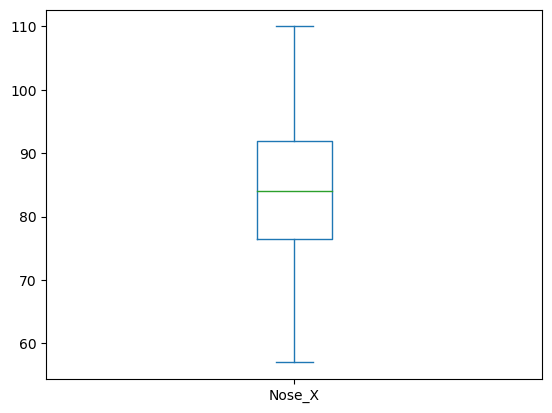

In [8]:
frames[frames.action == 'handclapping'].Nose_X.plot(kind='box')

In [9]:
import numpy as np
frames[frames['Nose_X'] == np.min(frames['Nose_X'])]

,src_video,Nose_X,action,dur
207,person09_running_d1_uncomp.avi,2,running,13.0


In [10]:
frames.sort_values('Nose_X')

,src_video,Nose_X,action,dur
207,person09_running_d1_uncomp.avi,2,running,13.00
160,person07_running_d1_uncomp.avi,3,running,12.48
66,person03_running_d3_uncomp.avi,3,running,15.00
112,person05_running_d1_uncomp.avi,4,running,11.40
64,person03_running_d1_uncomp.avi,6,running,15.20
...,...,...,...,...
272,person12_handwaving_d3_uncomp.avi,140,handwaving,27.96
80,person04_handwaving_d1_uncomp.avi,147,handwaving,29.28
153,person07_handwaving_d2_uncomp.avi,151,handwaving,30.08
155,person07_handwaving_d4_uncomp.avi,156,handwaving,31.20
